# Credit Risk Prediction


You have received data from LendingClub. LendingClub is/was a peer-to-peer platform for small loans which originated in the early days of facebook. It grew into a multi-billion dollar company with over 15 billion in loans provided. However, since the Covid pandemic and a merger with an other bank it has discontinued it's peer-to-peer lending. For further info see https://en.wikipedia.org/wiki/LendingClub

LendingClub made it's data available to the public, in an anonymised way obviously. We have data for a number of years of all loans which are approved on the platform. So we know which loans are completed (Loan status = Fully Paid), which loans are in progress (Current) and which loans are not payed back (Charged Off). We do not know why LendingClub stoped it's activities but let's assume that it is because there were too many loans not being payed. Our job is to build a model which is able to predict loans which which might not be repayed. Our employees can then contact these people to look for solutions or maybe not grant the loan from the start. 





## What you should deliver

A clean and documented notebook in which you do:
- exploratory data analysis (try to already eliminate a lot of features)
- preprocessing (at the end of your pre-pro phase you should have minimally 30 features and maximally 60)
- model building (optionally including feature selection)
- performance evaluation (ROC, AUC, PR)

At the end of your notebook, after you have done all your modelling and preprocessing you have to predict unknown loans (the test set). I will quantify your performance on this unknown data.

## What to look out for

Some variables are only measured when the loan is 'going on' e.g. date of next payment, last payment amount, days since last missed payment, how much of the loan is already paid, etc. These variables obviously need to be removed as we are building a model which delivers a prediction at the startpoint of the loan. 

In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

float #Anders krijg je een warming `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.

float

In [43]:
selection = ["id","acc_now_delinq", "addr_state", "annual_inc", "application_type", "disbursement_method", 
"earliest_cr_line", "emp_length", "emp_title", "fico_range_high", "fico_range_low", 
"grade", "home_ownership", "inq_fi", "installment", "int_rate", "verification_status", 
"loan_amnt", "funded_amnt_inv", "loan_status", "mort_acc", "num_bc_sats", "num_bc_tl", 
"num_il_tl", "num_rev_accts", "num_sats", "open_acc", "percent_bc_gt_75", "policy_code", 
"pub_rec", "pub_rec_bankruptcies", "pymnt_plan", "revol_bal", "sub_grade", "tax_liens", 
"term", "total_cu_tl", "zip_code"]
data = pd.read_csv("LendingClub_data.csv", usecols=selection, index_col="id")
data

C:\Users\dylan\AppData\Local\Temp\ipykernel_21012\3589287792.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("LendingClub_data.csv", usecols=selection, index_col="id")


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,mort_acc,num_bc_sats,num_bc_tl,num_il_tl,num_rev_accts,num_sats,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,disbursement_method
id,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,...,1.0,2.0,5.0,3.0,9.0,7.0,0.0,0.0,0.0,Cash
68355089,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,...,4.0,13.0,17.0,6.0,27.0,22.0,7.7,0.0,0.0,Cash
68341763,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,...,5.0,2.0,4.0,6.0,7.0,6.0,50.0,0.0,0.0,Cash
66310712,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,...,1.0,8.0,10.0,2.0,13.0,13.0,0.0,0.0,0.0,Cash
68476807,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,...,6.0,5.0,9.0,10.0,19.0,12.0,60.0,0.0,0.0,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88985880,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,9 years,MORTGAGE,...,3.0,2.0,15.0,9.0,23.0,5.0,50.0,0.0,0.0,Cash
88224441,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years,RENT,...,2.0,5.0,15.0,4.0,24.0,10.0,40.0,1.0,0.0,Cash
88215728,14000.0,14000.0,60 months,14.49,329.33,C,C4,Customer Service Technician,10+ years,MORTGAGE,...,1.0,4.0,12.0,3.0,17.0,8.0,50.0,0.0,0.0,Cash


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2193435 entries, 68407277 to Total amount funded in policy code 2: 521953170
Data columns (total 37 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   funded_amnt_inv       float64
 2   term                  object 
 3   int_rate              float64
 4   installment           float64
 5   grade                 object 
 6   sub_grade             object 
 7   emp_title             object 
 8   emp_length            object 
 9   home_ownership        object 
 10  annual_inc            float64
 11  verification_status   object 
 12  loan_status           object 
 13  pymnt_plan            object 
 14  zip_code              object 
 15  addr_state            object 
 16  earliest_cr_line      object 
 17  fico_range_low        float64
 18  fico_range_high       float64
 19  open_acc              float64
 20  pub_rec               float64
 21  revol_bal             float64
 22  

In [45]:
## Cleaning
### remove empty loans
data.dropna(axis=0, subset=["loan_amnt"], inplace=True)

### Create ST (short term) or LT (long term)
data["short_term_loan"] = 0 #Default is long term loan (60 months)
data.loc[data["term"] == " 36 months", "short_term_loan"] = 1 #If 36 months, make Short term loan

data.drop(["term"], axis=1, inplace=True)

### int_rate
data["int_rate_cat"] = 1 #<= 5
data.loc[ (data["int_rate"] > 5) & (data["int_rate"] <= 10), "int_rate_cat"] = 2 # 6 - 10
data.loc[ (data["int_rate"] > 10) & (data["int_rate"] <= 15), "int_rate_cat"] = 3 # 11 - 15
data.loc[ (data["int_rate"] > 15) & (data["int_rate"] <= 20), "int_rate_cat"] = 4 # 16 - 20
data.loc[ data["int_rate"] > 20, "int_rate_cat"] = 5 #> 20

data.drop(["int_rate"], axis=1, inplace=True)

### Installment
#Small, medium or large installment?
data["installment_cat"] = "SI"
data.loc[ data["installment"] <= 350, "installment_cat"] = "SI" #small installment
data.loc[ (data["installment"] > 350) & (data["installment"] <= 1000), "installment_cat"] = "MI" #medium
data.loc[ data["installment"] > 1000 , "installment_cat"] = "LI" #large

data = data.join(pd.get_dummies(data["installment_cat"]))

data.drop(["installment"], axis=1, inplace=True)
data.drop(["installment_cat"], axis=1, inplace=True)

### grade & subgrade
data["grade_num"] = "0"
for grade in data["grade"].unique(): #Turns char-grade into numeric
    #A = 1, B = 2, ...
    data.loc[data["grade"].str.contains(grade), "grade_num"] = str(ord(grade) - 64)

data["grade_num"] = data["grade_num"] + data["sub_grade"].str[1:] #Add subgrade too
data["grade_num"] = data["grade_num"].astype("int64")
data["grade_num"].dtype

data.drop(["grade"], axis=1, inplace=True)
data.drop(["sub_grade"], axis=1, inplace=True)

### emp_length
data["emp_ST"] = 1 #Default is working not so long (Short term (= ST))
data.loc[data["emp_length"] == "10+ years", "emp_ST"] = 0 #If more than 10, make long term

data.drop(["emp_length"], axis=1, inplace=True)

### home_ownership
data["home_ownership"].unique()
data["mortgage"] = 0

data.loc[data["home_ownership"] == "MORTGAGE", "mortgage"] = 1

data.drop(["home_ownership"], axis=1, inplace=True)

### annual_inc 
# https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system

data["income_class"] = "class_P" #poor <= 32048
data.loc[ (data["annual_inc"] > 32048) & (data["annual_inc"] <= 53413), "income_class"] = "class_LMC" #lower-middle class
data.loc[ (data["annual_inc"] > 53413) & (data["annual_inc"] <= 106827), "income_class"] = "class_MC" #middle class
data.loc[ (data["annual_inc"] > 106827) & (data["annual_inc"] <= 373894), "income_class"] = "class_UMC" #upper-middle class
data.loc[ (data["annual_inc"] > 373894) , "income_class"] = "class_R" #rich

data = data.join(pd.get_dummies(data["income_class"]))
data.drop(["income_class"], axis=1, inplace=True)

### verification_status
data["income_verified"] = 0
data.loc[data["verification_status"].str.contains("Verified"), "income_verified"] = 1

data.drop(["verification_status"], axis=1, inplace=True)

### loan_status
#### Zijn de labels, alleen "Fully Paid" & "Charged Off" behouden
for status in data["loan_status"].unique():
    if status == "Fully Paid":
        continue
    elif status == "Charged Off":
        continue
    else:
        data.drop(data[data["loan_status"] == status].index, inplace = True)
        print("Deleted", status)

data["fully_paid"] = 1       
data.loc[data["loan_status"] == "Charged Off", "fully_paid"] = 0


data.drop(["loan_status"], axis=1, inplace=True)

### pymnt_plan
# Met het opkuisen hierboven is er geen verschil meer tussen y/n
data.drop(["pymnt_plan"], axis=1, inplace=True)

### zip_code
#### https://en.wikipedia.org/wiki/List_of_ZIP_Code_prefixes
#### Doet uiteindelijk niets speciaals, zegt evenveel als addr_state, dus droppen

data.drop(["zip_code"], axis=1, inplace=True)

### addr_state
# PA = 1, SD = 2, GA = 3, MN = 4, SC = 5, RI = 6, NC = 7, CA = 8, VA = 9, AZ = 10, 
# IN = 11, MD = 12, NY = 13, TX = 14, KS = 15, NM = 16, AL = 17, WA = 18, OH = 19, 
# LA = 20, IL = 21, FL = 22, CO = 23, MI = 24, DC = 25, MA = 26, WI = 27, HI = 28, 
# NJ = 29, DE = 30, TN = 31, NH = 32, NE = 33, OR = 34, CT = 35, AR = 36, NV = 37, 
# WV = 38, MT = 39, WY = 40, OK = 41, KY = 42, MO = 43, VT = 44, MS = 45, UT = 46, 
# ND = 47, ME = 48, AK = 49, ID = 50, IA = 51, 

count = 0
data["addr_numb"] = 0
for state in data["addr_state"].unique():
    data.loc[(data["addr_state"] == state), "addr_numb"] = count
    count += 1

data.drop(["addr_state"], axis=1, inplace=True)

### earliest_cr_line
data["earliest_cr_line"] = data["earliest_cr_line"].str[4:] #Just take year, not months (dec-2001 -> 2001)

### fico_range_low & fico_range_high
#### Neem middelste getal in deze range, behandel dit als de score van die persoon, maak beoordeling based on american system
#### https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/

data["credit_score"] = "fico_P" #Poor
data["fico_range_high"] = data["fico_range_high"] - 2
data.loc[(data["fico_range_high"] >= 580) & (data["fico_range_high"] <= 669), "credit_score"] = "fico_F" #fair
data.loc[(data["fico_range_high"] >= 670) & (data["fico_range_high"] <= 739), "credit_score"] = "fico_G" #good
data.loc[(data["fico_range_high"] >= 740) & (data["fico_range_high"] <= 799), "credit_score"] = "fico_VG" #very good
data.loc[(data["fico_range_high"] >= 800) & (data["fico_range_high"] <= 850), "credit_score"] = "fico_E" #exceptional

data = data.join(pd.get_dummies(data["credit_score"]))
data.drop(["credit_score"], axis=1, inplace=True)
data.drop(["fico_range_low"], axis=1, inplace=True)
data.drop(["fico_range_high"], axis=1, inplace=True)

### pub_rec
#### “Derogatory” is seen as negative to lenders, and can include late payments, collection accounts, bankruptcy, charge-offs and other negative marks.
data["has_derpub"] = 0
data.loc[(data["pub_rec"] > 0), "has_derpub"] = 1

data.drop(["pub_rec"], axis=1, inplace=True)

### revol_bal
#### Amount on credit cards, 
data["revol_bal"] = (data["revol_bal"] / data["annual_inc"]) * 100 #Revolving balance % of annual income

data["revol_bal_cat"] = "credit_NR"
data.loc[data["revol_bal"] < 30, "revol_bal_cat"] = "credit_NR" #No Risk
data.loc[(data["revol_bal"] >= 30) & (data["revol_bal"] <= 50), "revol_bal_cat"] = "credit_SR" #Small Risk
data.loc[data["revol_bal"] > 50, "revol_bal_cat"] = "credit_HR" #High Risk

data = data.join(pd.get_dummies(data["revol_bal_cat"]))
data.drop(["revol_bal"], axis=1, inplace=True)
data.drop(["revol_bal_cat"], axis=1, inplace=True)
data.drop(["annual_inc"], axis=1, inplace=True)

### policy_code
#### is it publicly available this product (y = 1, n = 0)
#### All 1 so you can drop it
data.drop(["policy_code"], axis=1, inplace=True)

### application_type
#### Joint mag eruit
data.drop(data[data["application_type"] == "Joint App"].index, inplace = True)
data.drop(["application_type"], axis=1, inplace=True)


### acc_now_delinq
#### Heeft de aanvrager ooit achterstallige betalingen gehad die niet binnen de 30 dagen zijn betaald?
data["delinq_past"] = 0

data.loc[data["acc_now_delinq"] > 0, "delinq_past"] = 1

data.drop(["acc_now_delinq"], axis=1, inplace=True)

### inq_fi
#### A hard inquiry, also known as a hard pull, is a request to check your credit when you apply to borrow money through a credit card or loan. Each hard inquiry will lower your credit scores by a few points.
data["inq_fi_cat"] = 0

data.loc[(data["inq_fi"] > 0) & (data["inq_fi"] < 5), "inq_fi_cat"] = 1 # 1 - 4
data.loc[(data["inq_fi"] >= 5) & (data["inq_fi"] < 10), "inq_fi_cat"] = 2 # 5 - 9
data.loc[data["inq_fi"] >= 10, "inq_fi_cat"] = 3 # 10(+)

data.drop(["inq_fi"], axis=1, inplace=True)

### total_cu_tl
#### In simple terms, trade finance is when an exporter requires an importer to prepay for goods shipped. The importer naturally wants to reduce risk by asking the exporter to document that the goods have been shipped as proof.
data["past_fin_trade_cat"] = 0

data.loc[(data["total_cu_tl"] > 0) & (data["total_cu_tl"] < 5), "past_fin_trade_cat"] = 1 # 1 - 4
data.loc[(data["total_cu_tl"] >= 5) & (data["total_cu_tl"] < 10), "past_fin_trade_cat"] = 2 # 5 - 9
data.loc[data["total_cu_tl"] >= 10, "past_fin_trade_cat"] = 3 # 10(+)

data.drop(["total_cu_tl"], axis=1, inplace=True)

### mort_acc
#### number of mortgage accounts
data["mort_amt_cat"] = 0

data.loc[(data["mort_acc"] > 0) & (data["mort_acc"] < 5), "mort_amt_cat"] = 1 # 1 - 4
data.loc[(data["mort_acc"] >= 5) & (data["mort_acc"] < 10), "mort_amt_cat"] = 2 # 5 - 9
data.loc[data["mort_acc"] >= 10, "mort_amt_cat"] = 3 # 10(+)

data.drop(["mort_acc"], axis=1, inplace=True)

### num_il_tl
#### When you take on an installment loan, you're usually agreeing to pay back a specific amount of money over a specific period of time
#From what it looks like, installment accounts (num_il_tl) + revolvingaccounts (num_rev_accts) = overall accounts
#So combine num_il_tl, num_rev_accts & num_sats (% of accounts that is satisfactory)
#Different from bankcard accounts, so don't take into account here

data["satis_acc_perc"] = (data["num_sats"] / (data["num_il_tl"] + data["num_rev_accts"])) * 100
data["satis_acc_perc"] = data["satis_acc_perc"].fillna(0)

data.drop(["num_il_tl"], axis=1, inplace=True)

### num_rev_accts

data.drop(["num_rev_accts"], axis=1, inplace=True)

### num_sats

data.drop(["num_sats"], axis=1, inplace=True)

### percent_bc_gt_75
data["b75Perc_lim_cat"] = 0

data.loc[(data["percent_bc_gt_75"] > 0) & (data["percent_bc_gt_75"] <= 25), "b75Perc_lim_cat"] = 1 #"0 - 25"
data.loc[(data["percent_bc_gt_75"] > 25) & (data["percent_bc_gt_75"] <= 50), "b75Perc_lim_cat"] = 2 #"26 - 50"
data.loc[(data["percent_bc_gt_75"] > 50) & (data["percent_bc_gt_75"] <= 75), "b75Perc_lim_cat"] = 3 #"51 - 75"
data.loc[(data["percent_bc_gt_75"] > 75) & (data["percent_bc_gt_75"] <= 100), "b75Perc_lim_cat"] = 4 #"76 - 100"

data.drop(["percent_bc_gt_75"], axis=1, inplace=True)

### pub_rec_bankruptcies
data["bankrup_amt_cat"] = 0

data.loc[(data["pub_rec_bankruptcies"] > 0) & (data["pub_rec_bankruptcies"] < 5), "bankrup_amt_cat"] = 1 #"1 - 4"
data.loc[(data["pub_rec_bankruptcies"] >= 5) & (data["pub_rec_bankruptcies"] < 10), "bankrup_amt_cat"] = 2 #"5 - 9"
data.loc[data["pub_rec_bankruptcies"] >= 10, "bankrup_amt_cat"] = 3 #"10(+)"


data.drop(["pub_rec_bankruptcies"], axis=1, inplace=True)

### tax_liens
#Taxes not paid, which resulted in number of claims by gov on assets
data["claim_assets_cat"] = 0

data.loc[(data["tax_liens"] > 0) & (data["tax_liens"] < 5), "claim_assets_cat"] = 1 #"1 - 4"
data.loc[(data["tax_liens"] >= 5) & (data["tax_liens"] < 10), "claim_assets_cat"] = 2 #"5 - 9"
data.loc[(data["tax_liens"] >= 10) & (data["tax_liens"] < 15), "claim_assets_cat"] = 3 #"10 - 14"
data.loc[data["tax_liens"] >= 15, "claim_assets_cat"] = 4 #"15(+)"


data.drop(["tax_liens"], axis=1, inplace=True)

### disbursement_method
data["disbursement_method"].unique()

data["cash_method"] = 1
data.loc[data["disbursement_method"] == 'DirectPay', "cash_method"] = 0

data.drop(["disbursement_method"], axis=1, inplace=True)

Deleted Current
Deleted In Grace Period
Deleted Late (31-120 days)
Deleted Late (16-30 days)
Deleted Default
Deleted Does not meet the credit policy. Status:Fully Paid
Deleted Does not meet the credit policy. Status:Charged Off


In [46]:
### emp_title
#BC for blue_collar workers
#WC for white_collar workers
#UN for unemployed

data["emp_title"] = data["emp_title"].str.lower()
data["emp_title"].fillna("UN", inplace=True)
data["emp_title"] = data["emp_title"].str.replace(".", "")
data["emp_title"] = data["emp_title"].str.replace("/", "")
data["emp_title"] = data["emp_title"].str.replace(" ", "")

data.loc[data["emp_title"].str.contains("driver"), "emp_title"] = "driver"
data.loc[data["emp_title"].str.contains("nurse"), "emp_title"] = "rn"
data.loc[data["emp_title"].str.contains("med"), "emp_title"] = "rn"
data.loc[data["emp_title"].str.contains("health"), "emp_title"] = "rn"
data.loc[data["emp_title"].str.contains("manager"), "emp_title"] = "manager"
data.loc[data["emp_title"].str.contains("mgmt"), "emp_title"] = "manager"
data.loc[data["emp_title"].str.contains("management"), "emp_title"] = "manager"
data.loc[data["emp_title"].str.contains("supervisor"), "emp_title"] = "manager"
data.loc[data["emp_title"].str.contains("lead"), "emp_title"] = "manager"
data.loc[data["emp_title"].str.contains("president"), "emp_title"] = "manager"
data.loc[data["emp_title"].str.contains("ceo"), "emp_title"] = "manager"
data.loc[data["emp_title"].str.contains("police"), "emp_title"] = "police"

data.loc[data["emp_title"].str.contains("engineer"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("accountant"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("admin"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("associate"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("attorney"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("technician"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("attorney"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("analy"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("school"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("inc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("exec"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ass"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("mech"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("estate"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("customer"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("insur"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("elec"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("sale"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("legal"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("specialist"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("operator"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("foreman"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("cook"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("wash"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("culinary"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("scienc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("scient"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("consul"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cont"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("adv"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("clerk"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("lpn"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("instruc"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("prof"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("maint"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("credit"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("mach"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("cna"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("cash"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("secr"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("worker"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("bart"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("officer"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("pharm"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("store"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("coor"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("trainer"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("labor"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("intendent"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("phys"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("welder"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("dent"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("fighter"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("keeper"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("techno"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("tec"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("carrier"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("therapist"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("care"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("public"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("food"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("realtor"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("writer"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("univ"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("llp"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("theat"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("dispatch"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("partner"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("tv"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rep"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("grill"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cpc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cclc"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("attendant"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("recep"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("inspec"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("novaquest"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("custo"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("direct"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("coach"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("in"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("dept"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("develop"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("carp"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("md"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("warehouse"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("chef"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("agent"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("ltd"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("truck"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("visor"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("county"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("vice"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("vp"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("teacher"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("corp"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("anay"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("supermom"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("couns"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("army"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("archi"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("deputy"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("butler"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("bank"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pilot"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("editor"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cable"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("neima"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("buy"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("audit"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("merch"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("logis"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pool"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("horace"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("pastor"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("csr"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("books"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("anan"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("senior"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("forman"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("tri-state"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("cfo"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("recruit"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("hr"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("kum"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("sociofabrica"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("jp"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("captain"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("production"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("hotel"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("mortgage"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cadogan"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("tell"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cond"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("construc"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("program"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mgr"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("tut"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("govt"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("design"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("serg"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("hair"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("law"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pack"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("own"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("edu"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("home"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("fish"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("llc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("graham"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("holy"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("secur"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("esti"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("hospice"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("hospital"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("church"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("draiv"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("mart"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("plumb"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("cour"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("mrg"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("hand"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("retail"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("organ"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("dpa"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("it"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("gm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("house"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("oper"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("group"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("disney"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("wood"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("account"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("claim"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rect"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("two miles"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("found"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("breville"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("vbs"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("coo"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("human"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pres"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("child"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("comp"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sea"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("bar"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("usps"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("styl"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("shower"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("lvn"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("lab"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("beauty"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("text"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("proc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("kaiser"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("farm"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("imnc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("support"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("water"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("commer"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("broke"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("at&t"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cargo"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("chem"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sher"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("radio"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("hospira"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("tenant"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("dealer"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("manger"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("tron"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mobile"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("cleri"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("ups"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("pw"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("supply"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("sd"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("chatnam"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("sd"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pompano"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("prod"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("lib"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("level"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("caf"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("cert"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("verigent"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("craft"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("usaf"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("tomist"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("oceco"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("cpa"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("plan"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("head"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("lenn"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("avi"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("doc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("salon"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("stock"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("facu"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("grapher"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("fund"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("host"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("super"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pietr"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("fargo"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("emt"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("dmt"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("dame"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("at"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("resort"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("net"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("fargo"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("emt"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("dmt"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("dame"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("resort"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("net"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("port"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("def"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("prov"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("self"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("team"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("surg"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("deep"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("bak"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("opt"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("golf"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("mentor"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("con"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("help"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("navy"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("desk"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("handm"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("pmsi"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("eclec"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("addion"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("stif"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("cto"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("post"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("cale"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("bhsii"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("spout"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("nlacrc"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("agi"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("ibm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("for"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("of"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ps"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("steel"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("eye"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("lp"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("wire"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("veri"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("is"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("disp"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("enter"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("auto"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("unc"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("nan"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("wal"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("order"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("or"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mary"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("server"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("tsa"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("wri"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("reg"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("har"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ki"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cbb"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ncate"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ridge"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("cut"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("adj"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("bill"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sa"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("trade"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("mur"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("lane"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("dr"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("data"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("load"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("move"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("mace"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("pedia"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("staf"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("sold"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("pay"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("par"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pro"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pdr"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cm"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("ci"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("si"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ry"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("art"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("free"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rest"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("clean"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("pca"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("co"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("eng"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("0-4"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ball"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("tar"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("csa"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("cn"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("ener"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ser"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("track"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("mac"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("hha"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("e6"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("emmt"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("speci"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sch"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("lac"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("aes"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("rece"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("hank"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("fire"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("bok"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("nat"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("met"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("jud"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("dea"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sound"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("bou"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("list"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("isgn"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("pta"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("lec"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("dowd"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("sens"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pmsa"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rang"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("tro"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("chap"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("est"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("poly"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("voma"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pro"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("la"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("gov"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("chi"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pct"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ens"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("stud"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("lds"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("da"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("dsp"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("memb"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pia"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("trans"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("lyst"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("car"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("trea"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("ice"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("terra"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rssi"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mark"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("e-"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("hamil"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("star"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mail"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("crash"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("crew"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sara"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("tso"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ray"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("die"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("tile"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sex"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("toy"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("trai"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("chase"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rca"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("f4"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("her"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("cand"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("bran"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("abb"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("accent"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rda"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("wfbh"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("deliv"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("nst"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("fci"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mnt"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("rn"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("low"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("hii"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cat"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sig"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("harv"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ger"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("sgt"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("fed"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("brook"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("nail"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("mus"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mana"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("lsp"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("e5"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("e7"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("erk"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("mye"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ave"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("chick"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("u.s.a."), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("rail"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("pick"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("vick"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("hsni"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rar"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bat"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("pt"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("qa"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ship"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("la"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pet"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("opl"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sys"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("fdi"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("dba"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("lyn"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mf"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sta"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("val"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("yo"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("nsi"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("enli"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("deta"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("acet"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("aetn"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("grs"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("fs"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("uac"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("usm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("buil"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("atm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("all"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("co"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sn"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("go"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("nypd"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("ma"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bha"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("jfc"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("mcf"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mpi"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mara"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("asm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("saic"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pra"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("crui"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("pho"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("dwc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("oss"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("but"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("prev"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("cpo"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("exp"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("scad"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("vol"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ab"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("adp"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cst"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("haw"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sar"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("glob"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("smt"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("boo"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("att"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("duty"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("nova"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sono"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("loun"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("nyc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("aca"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("die"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("irs"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("far"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("foil"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("tse"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("hcvt"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("cht"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("csc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("reut"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("jer"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("tri"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("eyp"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("rec"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("usa"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("hec"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ac"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("oil"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("msl"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("lif"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("fie"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mfp"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("ssg"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rsr"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ams"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sli"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rem"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("ni"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("sev"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("sa"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sfc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("gif"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("ev2"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sbv"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bsee"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mc"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("deli"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("dod"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("teo"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("fsmm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("shop"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("hos"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("az"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("glaz"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("mlt"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sim"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("spa"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("fmg"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ems"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("la"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("kroger"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sod"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("spec"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ena"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("tel"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("e8"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("gro"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("cpht"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("tsp"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("iws"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("asa"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("gun"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("hard"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("xer"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("dell"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pfe"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("phsi"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("visc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("don"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cd"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("gu"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("cha"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("ech"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("aud"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("voc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ilrc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("lsac"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("bb"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("admi"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("hamon"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("tool"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("dai"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("nas"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("ai"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("np"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("jon"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("setter"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cjc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("reg"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("lewis"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("glg"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("stat"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("honey"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sol"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("os"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("et"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("fs"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("cca"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ed"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bro"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("anne"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("hse"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pret"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("traf"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("loy"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("faa"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("zel"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("paper"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("mh3"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pb"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sou"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("act"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rig"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("war"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("fsg"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bre"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("ovs"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("san"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("msr"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sha"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rea"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("groc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("und"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("riv"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bus"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("val"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("hyg"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ste"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("tehp"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("esss"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("fri"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("dhs"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("3m"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rylie"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("wdf"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("nbw"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("nbws"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("2210"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("dant"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("bny"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rrt"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bess"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("kane"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("nv"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rem"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("local"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("st"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pat"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("db"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bi"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bo"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("emer"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ccm"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("rsa"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("qc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("floa"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("thec"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bu"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("fuji"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("roo"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("jew"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("pum"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("sr"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("c2"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("eki"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("gp"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cent"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("ssa"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("full"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bsa"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("105"), "emp_title"] = "UN"
data.loc[data["emp_title"].str.contains("bag"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("ksm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("gd"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("rdh"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("tia"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("nev"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("priv"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("tfa"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("ocean"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cna"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("cs"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("apple"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rug"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ra4"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("r&t"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("crea"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("b&h"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("hp"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("lender"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("am"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("liv"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mud"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("priw"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("irl"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("cig"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("genius"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ies"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("syn"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("milk"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("icra"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("dev"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("cvs"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cler"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("john"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("dia"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("cny"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("hbr"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ai"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("chev"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("gre"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("frd"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bre"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("eci"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mfg"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ware"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("du"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("gsm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("os"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("hfc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("idf"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ds"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("om"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("csm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("lmt"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pi"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mil"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("tru"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bsm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pi"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("e4"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("vp"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("gfo"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("gen"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bw"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("oa"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ss"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("pa"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cmo"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mon"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sa"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mt"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("qi"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("w02"), "emp_title"] = "UN"

data.loc[data["emp_title"].str.contains("cc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("tek"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("haul"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sun"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("gt"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cw"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("fcu"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("pf"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("hol"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("nc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("deck"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("14s"), "emp_title"] = "UN"
data.loc[data["emp_title"].str.contains("fs"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("nob"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("bp"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cb"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ch"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sq"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("1199"), "emp_title"] = "UN"
data.loc[data["emp_title"].str.contains("fox"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("wra"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("hs"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("club"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("tend"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("pc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cfc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("lc"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("evs"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("aig"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("beck"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("vc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ann"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cs"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("tc"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("ubs"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("ea"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("umi"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("fh"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("35n"), "emp_title"] = "UN"
data.loc[data["emp_title"].str.contains("gln"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("wan"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("hour"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("ge"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ngk"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("res"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ben"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("cfa"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("hr"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("pen"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("koh"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("fas"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mb"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ari"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ho"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("ex"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("pub"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ml"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("can"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("38b"), "emp_title"] = "UN"
data.loc[data["emp_title"].str.contains("eh"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ne"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("det"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("rv"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ln"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bri"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ppd"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("gm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("en"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("wi"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("fis"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("clm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ther"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mig"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ats"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("uko"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("rs"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("urs"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("hil"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("fnfg"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("brav"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sls"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("yda"), "emp_title"] = "UN"

data.loc[data["emp_title"].str.contains("jai"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("cls"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("fl"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("ise"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("wol"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("wax"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("qm1"), "emp_title"] = "UN"

data.loc[data["emp_title"].str.contains("gs"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("feo"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("scp"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("nov"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ph"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("fp"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("ow"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mol"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("per"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rt"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ew"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bra"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pow"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("we"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("efda"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("15"), "emp_title"] = "UN"
data.loc[data["emp_title"].str.contains("ct"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("dc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("son"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("ap"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ms"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sg"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mvr"), "emp_title"] = "UN"
data.loc[data["emp_title"].str.contains("doe"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bsw"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rf"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("cra"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("fa"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("oh"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("gc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ec"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ic"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bc"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("hca"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ca"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("o-2"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("re"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ev"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mer"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("as"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("bn"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("fu"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("nd"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("fraz"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("loe"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mv"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ts"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("gra"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("hu"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("bs"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("qbe"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("vsp"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("wg"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ua"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("di"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("se"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ux"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("zer"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("le"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("moe"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("kel"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("ba"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("heb"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sup"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("emr"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("um"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("em"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pu"), "emp_title"] = "BC"

data.loc[data["emp_title"].str.contains("lt"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("etl"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("tjx"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("kn"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("li"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("mn"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("po"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("as"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("te"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sw"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("oc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("pv"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("fd"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("at"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("vhd"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ht"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("un"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("rs"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("aw"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("ar"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("us"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("li"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("kc"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("mm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("hf"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("ot"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("dm"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ix"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("ty"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("sf"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("fm"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("t"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("g"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("2"), "emp_title"] = "UN"

data.loc[data["emp_title"].str.contains("v"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("c"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("b"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("5"), "emp_title"] = "UN"
data.loc[data["emp_title"].str.contains("f"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("e9"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("a"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("i"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("k"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("d"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("s"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("l"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("n"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("4"), "emp_title"] = "UN"
data.loc[data["emp_title"].str.contains("m"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("h"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("u"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("3"), "emp_title"] = "UN"
data.loc[data["emp_title"].str.contains("o"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("p"), "emp_title"] = "WC"

data.loc[data["emp_title"].str.contains("1"), "emp_title"] = "UN"
data.loc[data["emp_title"].str.contains("8"), "emp_title"] = "UN"
data.loc[data["emp_title"].str.contains("e"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("7-11"), "emp_title"] = "BC"
data.loc[data["emp_title"].str.contains("j"), "emp_title"] = "WC"
data.loc[data["emp_title"].str.contains("9"), "emp_title"] = "UN"
data.loc[data["emp_title"].str.contains("r"), "emp_title"] = "UN"

data.loc[data["emp_title"] == "rn", "emp_title"] = "BC"
data.loc[data["emp_title"] == "teacher", "emp_title"] = "WC"
data.loc[data["emp_title"] == "manager", "emp_title"] = "WC"
data.loc[data["emp_title"] == "owner", "emp_title"] = "WC"
data.loc[data["emp_title"] == "driver", "emp_title"] = "BC"
data.loc[data["emp_title"] == "sales", "emp_title"] = "BC"
data.loc[data["emp_title"] == "police", "emp_title"] = "BC"
data.loc[data["emp_title"] == "police", "emp_title"] = "BC"
data.loc[data["emp_title"] == "wc", "emp_title"] = "WC"
data.loc[data["emp_title"] == "bc", "emp_title"] = "BC"
data.loc[data["emp_title"] == "server", "emp_title"] = "BC"
data.loc[data["emp_title"] == "b", "emp_title"] = "UN"
data.loc[data["emp_title"] == '', "emp_title"] = "UN"


data = data.join(pd.get_dummies(data["emp_title"]))
data.drop(["emp_title"], axis=1, inplace=True)

C:\Users\dylan\AppData\Local\Temp\ipykernel_21012\3200246028.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["emp_title"] = data["emp_title"].str.replace(".", "")


In [47]:
### open_acc
# number of open credit line in borrowers file
data["credit_line_cat"] = 0

data.loc[(data["open_acc"] > 0) & (data["open_acc"] < 5), "credit_line_cat"] = 1 #"1 - 4"
data.loc[(data["open_acc"] >= 5) & (data["open_acc"] < 10), "credit_line_cat"] = 2 #"5 - 9"
data.loc[(data["open_acc"] >= 10) & (data["open_acc"] < 15), "credit_line_cat"] = 3 #"10 - 14"
data.loc[(data["open_acc"] >= 15) & (data["open_acc"] < 20), "credit_line_cat"] = 4 #"15 - 19"
data.loc[(data["open_acc"] >= 20), "credit_line_cat"] = 5 #"20(+)"

data.drop(["open_acc"], axis=1, inplace=True)

### num_bc_sats
#### Number of satisfactory bankcard accounts
#### Satisfactory accounts are current or have been paid.
#### % of total bankcard accounts
data["satis_bankc_perc"] = round((data["num_bc_sats"] / data["num_bc_tl"]) * 100, 2)
data["satis_bankc_perc"] = data["satis_bankc_perc"].fillna(0)

### num_bc_tl
#### Number of bankcard accounts

data.drop(["num_bc_sats"], axis=1, inplace=True)
data.drop(["num_bc_tl"], axis=1, inplace=True) #Only needed for % of satisfactory bankcard accounts :-)


In [48]:
data.iloc[:,:]

,loan_amnt,funded_amnt_inv,earliest_cr_line,short_term_loan,int_rate_cat,LI,MI,SI,grade_num,emp_ST,...,satis_acc_perc,b75Perc_lim_cat,bankrup_amt_cat,claim_assets_cat,cash_method,BC,UN,WC,credit_line_cat,satis_bankc_perc
id,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,3600.0,2003,1,3,0,0,1,34,0,...,58.333333,0,0,0,1,0,0,1,2,40.00
68355089,24700.0,24700.0,1999,1,3,0,1,0,31,0,...,66.666667,1,0,0,1,0,0,1,5,76.47
68476807,10400.0,10400.0,1998,0,5,0,0,1,61,1,...,41.379310,3,0,0,1,0,0,1,3,55.56
68426831,11950.0,11950.0,1987,1,3,0,1,0,33,1,...,83.333333,4,0,0,1,1,0,0,2,100.00
68476668,20000.0,20000.0,1990,1,2,0,1,0,22,0,...,52.173913,4,0,0,1,0,0,1,3,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89905081,18000.0,18000.0,2004,0,2,0,1,0,22,1,...,47.222222,2,0,0,1,0,1,0,4,60.00
88948836,29400.0,29400.0,2002,0,3,0,1,0,33,1,...,59.259259,2,0,0,1,1,0,0,4,77.78
89996426,32000.0,32000.0,2011,0,3,0,1,0,34,1,...,93.333333,0,0,0,1,0,0,1,3,100.00


In [49]:
## Opsplitsen van labels & data
data_labels = pd.DataFrame(data["fully_paid"])
data.drop(["fully_paid"], axis=1, inplace=True)

data_labels.head()

,fully_paid
id,
68407277,1
68355089,1
68476807,1
68426831,1
68476668,1


In [50]:
## Model
### Builden
loan_model = RandomForestClassifier()

### Training model with cleaned data
loan_model.fit(data, data_labels["fully_paid"])

### Probability
prob = loan_model.predict_proba(data)

In [51]:
### prediction
prediction_check = pd.DataFrame({'True label':data_labels["fully_paid"],
                                'Probability': prob[:,1]})

prediction_check

,True label,Probability
id,,
68407277,1,0.95
68355089,1,0.92
68476807,1,0.86
68426831,1,0.92
68476668,1,0.94
...,...,...
89905081,1,0.91
88948836,1,0.83
89996426,0,0.32


In [52]:
### TP, TN, FP, FN
TP = sum(np.logical_and(prediction_check['Probability'] >= 0.5, prediction_check['True label'] == 1))
TN = sum(np.logical_and(prediction_check['Probability'] < 0.5, prediction_check['True label'] == 0))
FP = sum(np.logical_and(prediction_check['Probability'] >= 0.5, prediction_check['True label'] == 0))
FN = sum(np.logical_and(prediction_check['Probability'] < 0.5, prediction_check['True label'] == 1))

print(f"True positives: {TP}")
print(f"True negatives: {TN}")
print(f"False positives: {FP}")
print(f"False negatives: {FN}")

True positives: 1004363
True negatives: 249083
False positives: 32
False negatives: 0


In [53]:
sensitivity_recall = TP /(TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

print("sensitivity/recall = " + str(100*sensitivity_recall)+ "%")
print("specificity = " + str(100*specificity)+ "%")
print("precision = " + str(100*precision)+ "%")

sensitivity/recall = 100.0%
specificity = 99.98715452702567%
precision = 99.99681400245919%


In [54]:
## ROC
fpr_training, tpr_training, thresh = metrics.roc_curve(prediction_check['True label'] == 1, prediction_check['Probability'])

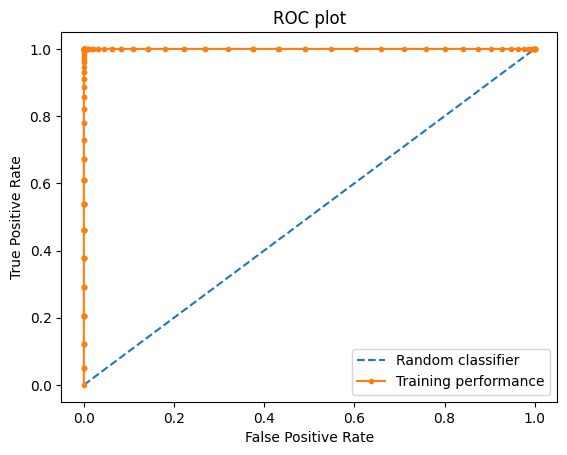

In [55]:
plt.plot([0,1], [0,1], linestyle='--', label='Random classifier')
plt.plot(fpr_training, tpr_training, marker='.', label='Training performance')
plt.title('ROC plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [56]:
## Compare with test-train split
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    data_labels["fully_paid"], 
                                                    random_state=42,
                                                    stratify=data_labels["fully_paid"])

In [57]:
## Model
### Builden
loan_model_tt = RandomForestClassifier()

### Training model with cleaned data
loan_model_tt.fit(X_train, y_train)

### Probability
prob_tt = loan_model.predict_proba(X_test)

prediction_check_tt = pd.DataFrame({'True label':y_test,
                                'Probability':prob_tt[:,1]})


fpr_test, tpr_test, thresh = metrics.roc_curve(prediction_check['True label'] == 1, prediction_check['Probability'])

prediction_check_tt

,True label,Probability
id,,
48866129,0,0.20
66076610,1,0.88
61451058,1,0.95
61963231,0,0.28
84769343,0,0.28
...,...,...
102646808,1,0.94
3353371,1,0.96
53544306,1,0.90


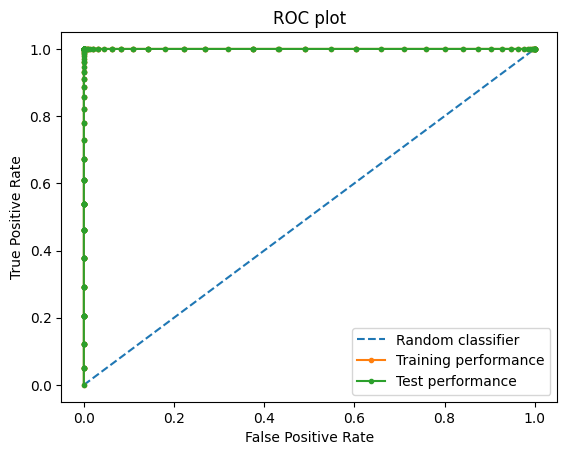

In [58]:
plt.plot([0,1], [0,1], linestyle='--', label='Random classifier')
plt.plot(fpr_training, tpr_training, marker='.', label='Training performance')
plt.plot(fpr_test, tpr_test, marker='.', label='Test performance')
plt.title('ROC plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()